In [12]:
!pip install lifelines
import pandas as pd
import numpy as np
import lifelines
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [9]:
df = pd.read_csv('participants.ji0tedp.tsv', sep='\t')
print(df.head()) 
df['dead']=np.where(df['vital_status']=='dead', 1, 0)
print(df)

  participant_id                                      aliases  \
0        RA_1045                           1045, RP-1700_1045   
1        RA_1078                           1078, RP-1700_1078   
2        RA_1326                           1326, RP-1700_1326   
3        RA_1373  1373, GM-130, IMMU-19, RP-1700_1373, T01174   
4        RA_1526                           1526, RP-1700_1526   

  tumor_primary_site                                   tumor_morphology  \
0       BREAST (C50)  C50  (8522/3 INFILTRATING DUCT AND LOBULAR CAR...   
1       BREAST (C50)       C50 (8521/3 INFILTRATING DUCTULAR CARCINOMA)   
2       BREAST (C50)   C50 (8520/3 INFILTRATING LOBULAR CARCINOMA, NOS)   
3       BREAST (C50)       C50 (8521/3 INFILTRATING DUCTULAR CARCINOMA)   
4        COLON (C18)          C54  (8380/3 ENDOMETRIOID ADENOCARCINOMA)   

  tumor_molecular_subtype  gender     race  age_at_diagnosis  \
0           ER+/PR-/HER2-  female  unknown              61.6   
1           ER+/PR+/HER2-  fem

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


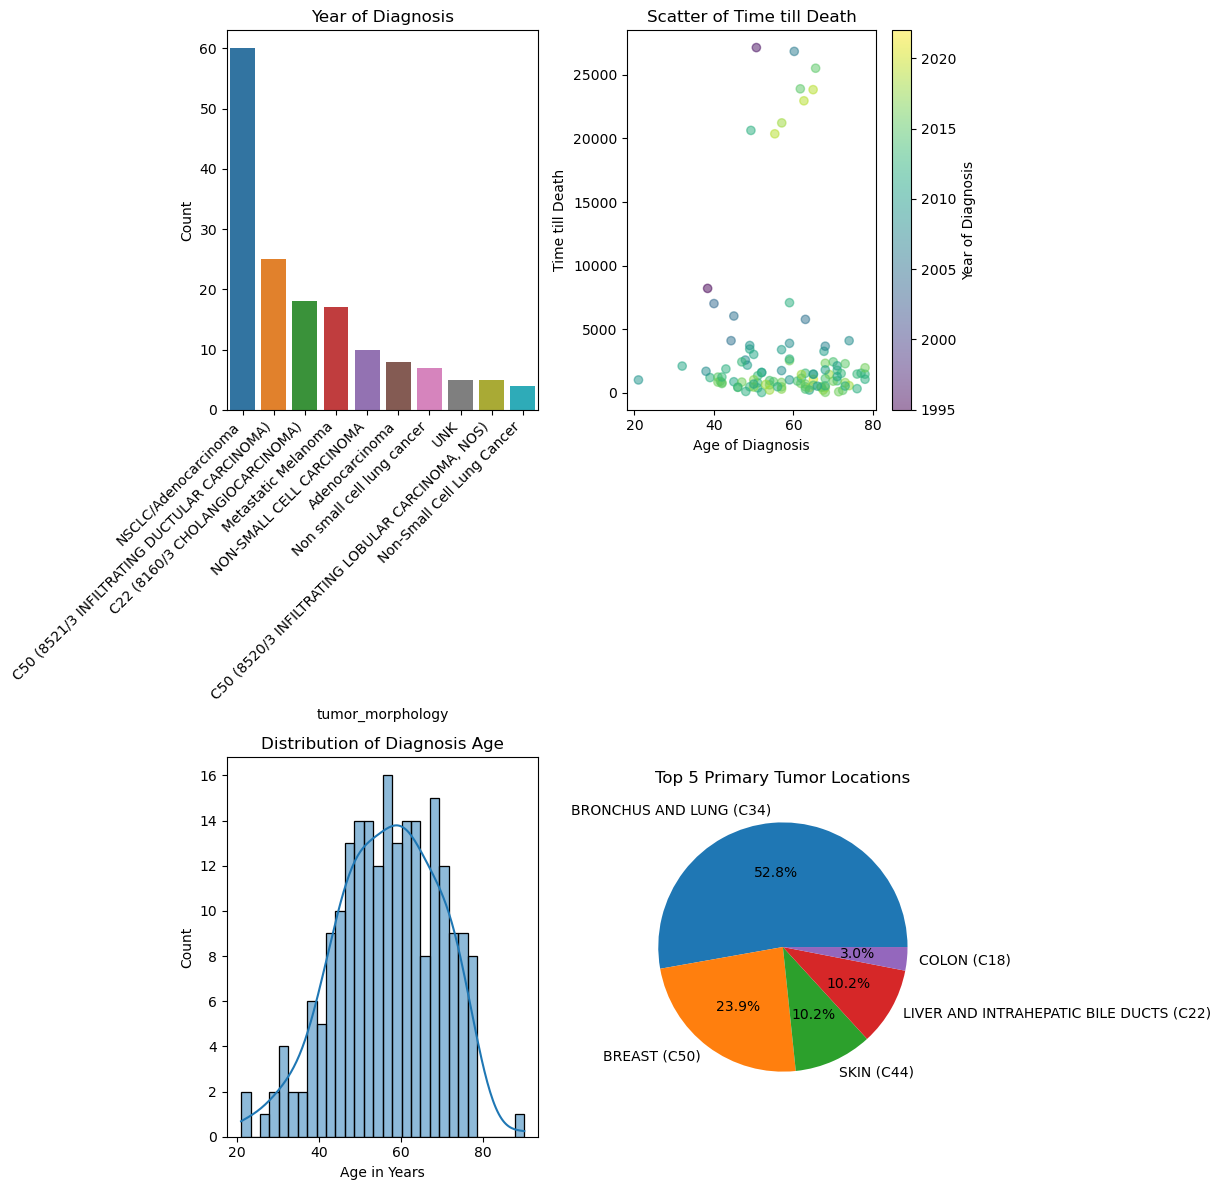

In [10]:

plt.figure(figsize=(12, 12))

# 1. Bar chart of volcanoes by region
plt.subplot(2, 2, 1)
morph = df['tumor_morphology'].value_counts().head(10)
sns.barplot(x=morph.index, y=morph.values)
plt.title('Year of Diagnosis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.scatter(df['age_at_diagnosis'], df['death_date_dfd'], 
            alpha=0.5, c=df['year_of_diagnosis'], cmap='viridis')
plt.colorbar(label='Year of Diagnosis')
plt.title('Scatter of Time till Death')
plt.xlabel('Age of Diagnosis')
plt.ylabel('Time till Death')

plt.subplot(2, 2, 3)
sns.histplot(df['age_at_diagnosis'].dropna(), bins=30, kde=True)
plt.title('Distribution of Diagnosis Age')
plt.xlabel('Age in Years')

plt.subplot(2, 2, 4)
type_counts = df['tumor_primary_site'].value_counts().head(5)
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Top 5 Primary Tumor Locations')


plt.tight_layout()
plt.show()

In [16]:
    kmf = KaplanMeierFitter()
    kmf.fit(df['death_date_dfd'], event_observed=df['dead'])
    kmf.plot_survival_function()
    kmf.print_summary()

TypeError: NaNs were detected in the dataset. Try using pd.isnull to find the problematic values.